In [1]:
import os
import pandas as pd
import xlrd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.options.display.max_rows = 55
pd.options.display.max_columns = 55

In [3]:
ROOT_DIR = "/Users/pus/ML/Лаборатория/СеверСталь/Probe/"
DIR_PATH = "Probe_Data/"
for filename in os.listdir(ROOT_DIR + DIR_PATH):
    print(filename)

Февраль.xlsx
.DS_Store
SensorsData.csv
10 фераля _избранные сигналы.txt
Febraury_PredData.csv
2020_02_10_PrepData.csv
Febraury_StopLog.csv
.ipynb_checkpoints


In [4]:
xl = pd.ExcelFile(''.join([ROOT_DIR, DIR_PATH ,"Февраль.xlsx"]))

<div class = "alert alert-block alert-info">

<b>Определение величин</b>:
* `DayShiftTimes_inds, tuple(first, second)` : индексы исходной таблицы журнальных записей, определяющие блок строк, отвечающих за времена остановки оборудования в <b>дневную смену</b>
    
* `NightShiftTimes_inds, tuple(first, second)` : индексы исходной таблицы журнальных записей, определяющие блок строк, отвечающих за времена остановки оборудования в <b>ночную смену</b>

* `Reason_ind, int` : индекс колонки содержащей <b>причины</b> остановки
    
* `Begin_ind, int` : индекс колонки содержащей время <b>начала</b> остановки
    
* `End_ind, int` : индекс колонки содержащей время <b>конца</b> остановки
    
* `Duration_ind, int` : индекс колонки содержащей <b>продолжительность</b> остановки

</div>

In [11]:
DayShiftTimes_inds = (4,6) 
NightShiftTimes_inds = (14,16)

Reason_ind = 8
Begin_ind = 12
End_ind = 13
Duration_ind = 14

Result_Log = pd.DataFrame(columns=["Reason", "Begin", "End", "Duration"])
for day in range(1,29):
    log_df = xl.parse(str(day), header=0)
    
    
    # Парсинг величин в дневную смену
    DST_Reasons = log_df.iloc[slice(*DayShiftTimes_inds), Reason_ind].dropna().values
    DST_Begin = log_df.iloc[slice(*DayShiftTimes_inds), Begin_ind].dropna().values
    DST_Begin = np.array([pd.to_datetime(f"2020/02/{day+1} {T.hour}:{T.minute}:00", format = "%Y/%m/%d", yearfirst=True) \
                          if (0 <= int(T.hour) <= 6) \
                          else pd.to_datetime(f"2020/02/{day} {T.hour}:{T.minute}:00", format = "%Y/%m/%d", yearfirst=True) \
                          for T in DST_Begin])
    DST_End = log_df.iloc[slice(*DayShiftTimes_inds), End_ind].dropna().values
    DST_End = np.array([pd.to_datetime(f"2020/02/{day+1} {T.hour}:{T.minute}:00", format = "%Y/%m/%d", yearfirst=True) \
                          if (0 <= int(T.hour) <= 6) \
                          else pd.to_datetime(f"2020/02/{day} {T.hour}:{T.minute}:00", format = "%Y/%m/%d", yearfirst=True) \
                          for T in DST_End])
    DST_Duration = log_df.iloc[slice(*DayShiftTimes_inds), Duration_ind].dropna().values
    
    
    # Парсинг величин в ночную смену
    NST_Reasons = log_df.iloc[slice(*NightShiftTimes_inds), Reason_ind].dropna().values
    NST_Begin = log_df.iloc[slice(*NightShiftTimes_inds), Begin_ind].dropna().values
    NST_Begin = np.array([pd.to_datetime(f"2020/02/{day+1} {T.hour}:{T.minute}:00", format = "%Y/%m/%d", yearfirst=True) \
                          if (0 <= int(T.hour) <= 6) \
                          else pd.to_datetime(f"2020/02/{day} {T.hour}:{T.minute}:00", format = "%Y/%m/%d", yearfirst=True) \
                          for T in NST_Begin])
    NST_End = log_df.iloc[slice(*NightShiftTimes_inds), End_ind].dropna().values
    NST_End = np.array([pd.to_datetime(f"2020/02/{day+1} {T.hour}:{T.minute}:00", format = "%Y/%m/%d", yearfirst=True) \
                          if (0 <= int(T.hour) <= 6) \
                          else pd.to_datetime(f"2020/02/{day} {T.hour}:{T.minute}:00", format = "%Y/%m/%d", yearfirst=True) \
                          for T in NST_End])
    NST_Duration = log_df.iloc[slice(*NightShiftTimes_inds), Duration_ind].dropna().values
    
    # Конкатенация данных за дневную и ночную смены и конвертация в pd.DataFrame
    day_data = pd.DataFrame(\
    list(zip(DST_Reasons,
             DST_Begin,
             DST_End,
             DST_Duration)) \
    + \
    list(zip(NST_Reasons,
             NST_Begin,
             NST_End,
             NST_Duration))
                           ,columns=["Reason", "Begin", "End", "Duration"])
    
    Result_Log = pd.concat([Result_Log, day_data], axis=0, ignore_index=True)

In [19]:
Result_Log.Duration = (Result_Log.End - Result_Log.Begin).values
Result_Log

,Reason,Begin,End,Duration
0,ппр,2020-02-06 10:25:00,2020-02-06 13:25:00,03:00:00
1,вибрация,2020-02-10 10:55:00,2020-02-10 11:10:00,00:15:00
2,вибрация,2020-02-12 03:55:00,2020-02-12 04:10:00,00:15:00
3,ппр,2020-02-12 09:03:00,2020-02-12 11:50:00,02:47:00
4,вибрация,2020-02-13 11:00:00,2020-02-13 14:05:00,03:05:00
5,летка,2020-02-14 09:30:00,2020-02-14 10:20:00,00:50:00
6,вибрация,2020-02-16 10:05:00,2020-02-16 10:20:00,00:15:00
7,вибрация,2020-02-16 11:05:00,2020-02-16 11:20:00,00:15:00
8,ппр,2020-02-17 09:35:00,2020-02-17 11:51:00,02:16:00
9,ппр,2020-02-17 23:05:00,2020-02-18 03:40:00,04:35:00


In [20]:
Result_Log.Reason = Result_Log.Reason.apply(lambda x: x.lower()).values

In [21]:
Result_Log.to_csv("../Probe_Data/Febraury_StopLog.csv", index=0)

## Немного статистики

In [22]:
%config InlineBackend.figure_format = "retina"

In [23]:
reasons_count


вибрация    12
ппр          5
летка        2
Name: Reason, dtype: int64

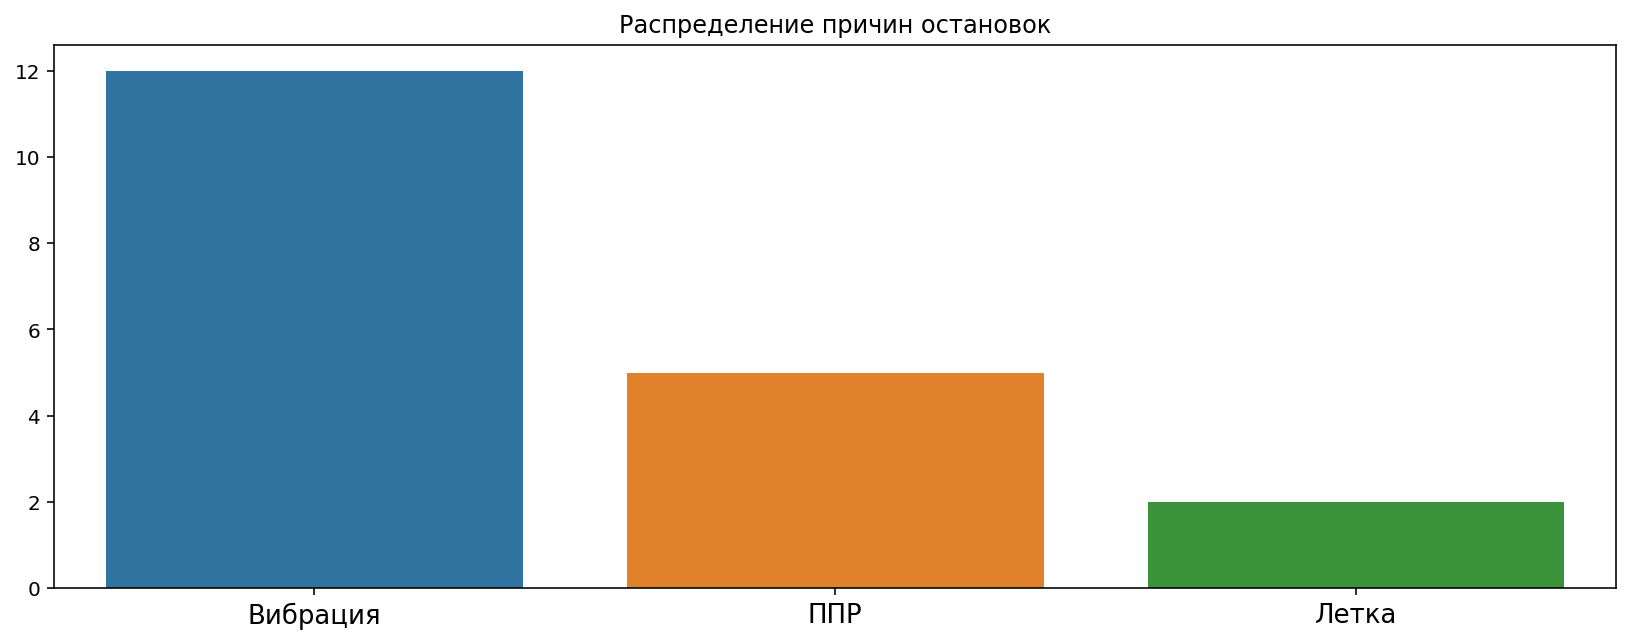

In [24]:
reasons_count = Result_Log.Reason.value_counts()
Reasons = ["Вибрация", "ППР", "Летка"]
plt.figure(figsize=(14,5))
plt.title("Распределение причин остановок")
plt.xticks(fontsize=13)
sns.barplot(x = Reasons, y=reasons_count.values)

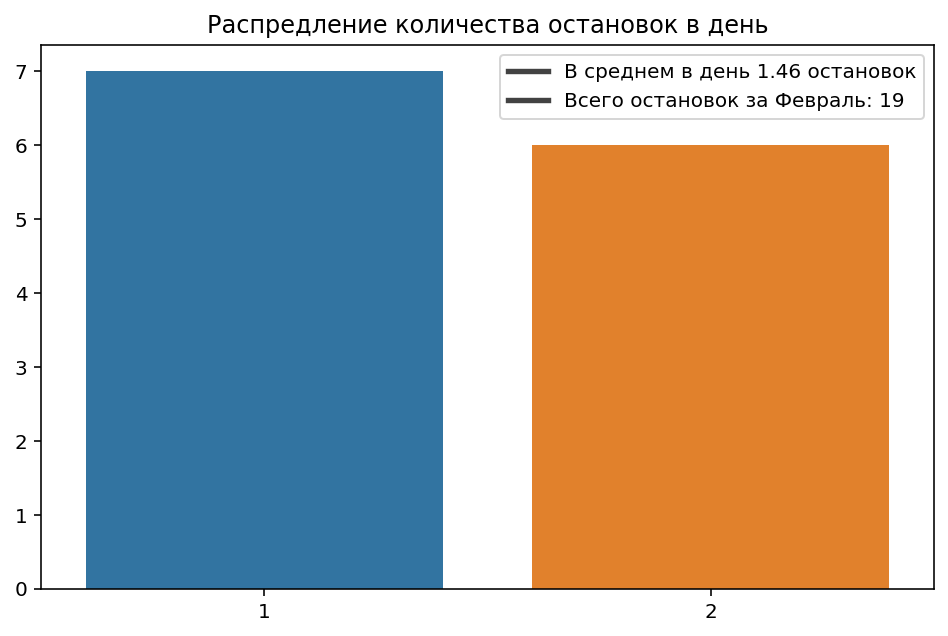

In [25]:
import seaborn as sns
stops_per_day = Result_Log.Begin.apply(lambda x: x.day).value_counts()
days = stops_per_day.value_counts()
plt.figure(figsize=(8,5))
plt.title("Распредление количества остановок в день")
sns.barplot(x = days.index, y=days.values)
plt.legend([f"В среднем в день {stops_per_day.mean():.2f} остановок",
            f"Всего остановок за Февраль: {stops_per_day.sum()}"])